<a href="https://colab.research.google.com/github/AnujaTheophilus/Newrepo/blob/main/IntermediateAssesment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

In [ ]:
X = pd.read_csv('/content/train_ctrUa4K.csv')
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
X.shape

(614, 13)

In [ ]:
X.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
X.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
X.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

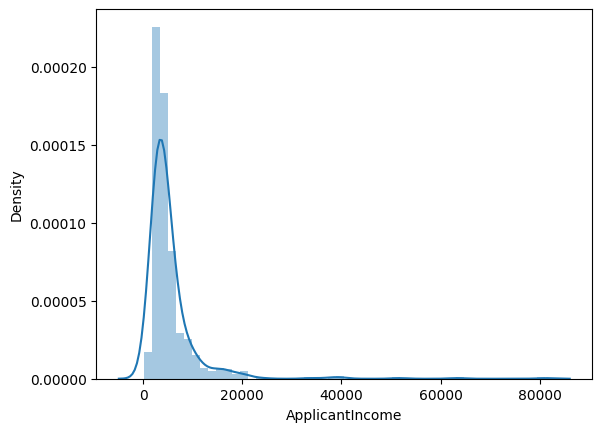

In [ ]:
sns.distplot(X['ApplicantIncome'])
plt.show()

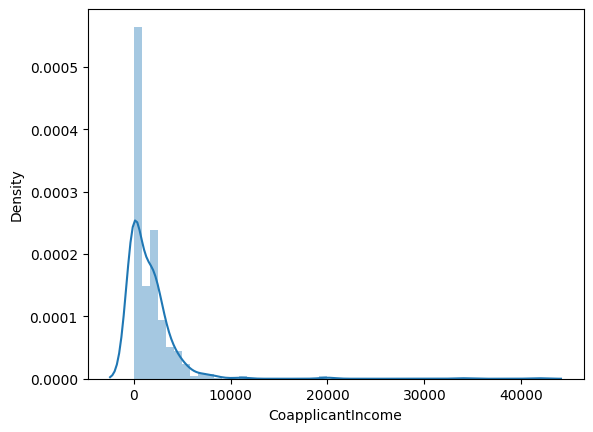

In [ ]:
sns.distplot(X['CoapplicantIncome'])
plt.show()

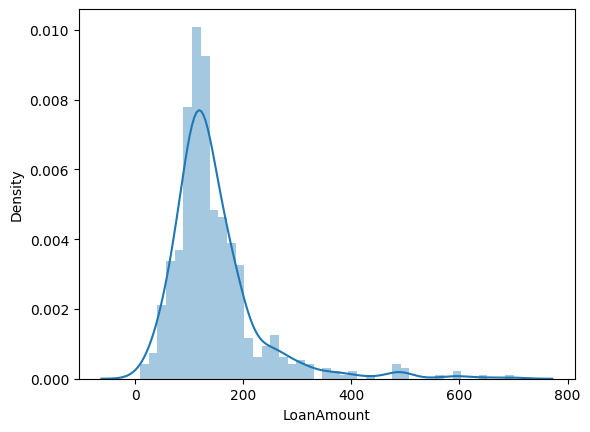

In [ ]:
sns.distplot(X['LoanAmount'])
plt.show()

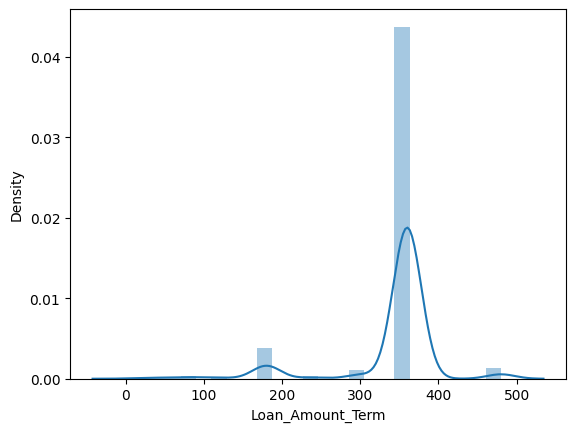

In [ ]:
sns.distplot(X['Loan_Amount_Term'])
plt.show()

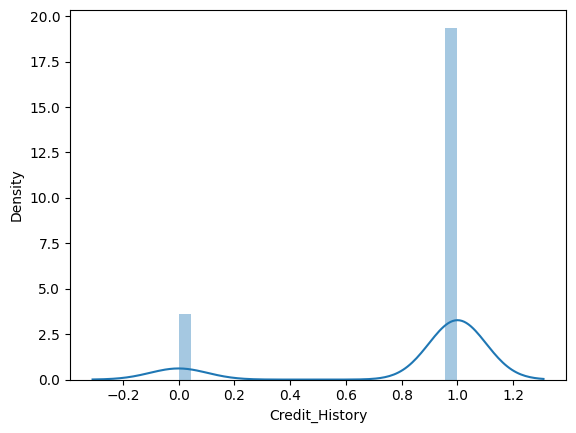

In [ ]:
sns.distplot(X['Credit_History'])
plt.show()

In [ ]:
X.fillna({'ApplicantIncome':X['ApplicantIncome'].median(),'CoapplicantIncome':X['CoapplicantIncome'].median(),'LoanAmount':X['LoanAmount'].median(),
          'Loan_Amount_Term':X['Loan_Amount_Term'].median(),'Credit_History':X['Credit_History'].median()},inplace=True)


In [ ]:
X.fillna({'Gender':X['Gender'].mode()[0],'Married':X['Married'].mode()[0],'Dependents':X['Dependents'].mode()[0],'Self_Employed':X['Self_Employed'].mode()[0]},inplace=True)

In [ ]:
X.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
X['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [ ]:
X['Gender'] = X['Gender'].map({'Male':1,'Female':0})
X['Married'] = X['Married'].map({'Yes':1,'No':0})
X['Education'] = X['Education'].map({'Graduate':1,'Not Graduate':0})
X['Self_Employed'] = X['Self_Employed'].map({'Yes':1,'No':0})
X['Property_Area'] = X['Property_Area'].map({'Urban':2,'Rural':0,'Semiurban':1})
X['Loan_Status'] = X['Loan_Status'].map({'Y':1,'N':0})
X['Dependents'] = X['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [ ]:
corr_matrix = X.corr()
corr_matrix

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,-0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118
Education,-0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.168759,0.073928,0.073658,0.065243,0.085884
Self_Employed,-0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.106904,0.146546,0.163103,0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


In [ ]:
sc = StandardScaler()
X['CoapplicantIncome'] = sc.fit_transform(X[['CoapplicantIncome']])
X['LoanAmount'] = sc.fit_transform(X[['LoanAmount']])
X['Loan_Amount_Term'] = sc.fit_transform(X[['Loan_Amount_Term']])


In [ ]:
y = X['Loan_Status']
X.drop(['Loan_Status'],axis=1,inplace=True)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6504065040650406


In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7560975609756098


In [ ]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7804878048780488


In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6260162601626016


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.6991869918699187


In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7804878048780488


In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
y_test.values

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
test = pd.read_csv('/content/test_lAUu6dG.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test.shape

(367, 12)

In [ ]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [ ]:
test.fillna({'LoanAmount':X['LoanAmount'].median(),'Loan_Amount_Term':X['Loan_Amount_Term'].median(),'Credit_History':X['Credit_History'].median()},inplace=True)


In [ ]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [ ]:
test.fillna({'Gender':test['Gender'].mode()[0],'Dependents':test['Dependents'].mode()[0],'Self_Employed':test['Self_Employed'].mode()[0]},inplace=True)

In [ ]:
test['Gender'] = test['Gender'].map({'Male':1,'Female':0})
test['Married'] = test['Married'].map({'Yes':1,'No':0})
test['Education'] = test['Education'].map({'Graduate':1,'Not Graduate':0})
test['Self_Employed'] = test['Self_Employed'].map({'Yes':1,'No':0})
test['Property_Area'] = test['Property_Area'].map({'Urban':2,'Rural':0,'Semiurban':1})
test['Dependents'] = test['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [ ]:
y.isna().sum()

0

In [ ]:
y.dtypes

dtype('int64')

In [ ]:
ID = test['Loan_ID']
ID

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [ ]:
test.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
prediction = svc.predict(test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
test['Loan_Status'] = pd.DataFrame({'Loan_Status':prediction})
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,1
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,1
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,1
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2,1
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,0,1,4009,1777,113.0,360.0,1.0,2,1
363,1,1,0,1,0,4158,709,115.0,360.0,1.0,2,1
364,1,0,0,1,0,3250,1993,126.0,360.0,1.0,1,1
365,1,1,0,1,0,5000,2393,158.0,360.0,1.0,0,1


In [ ]:
test['Loan_Status'] = test['Loan_Status'].map({1:'Y',0:'N'})

In [ ]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,Y
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,Y
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,Y
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2,Y
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,0,1,4009,1777,113.0,360.0,1.0,2,Y
363,1,1,0,1,0,4158,709,115.0,360.0,1.0,2,Y
364,1,0,0,1,0,3250,1993,126.0,360.0,1.0,1,Y
365,1,1,0,1,0,5000,2393,158.0,360.0,1.0,0,Y


In [ ]:
status = test['Loan_Status']

In [ ]:
output = pd.concat([ID,status],axis=1)
output

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [ ]:
output.to_csv('output.csv',index=False)